In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data_dir = 'C:/Users/User/OneDrive/바탕 화면/Tobigs/교안/6주차/Week6_NN심화_Assignment/'

# 데이터 확인

In [3]:
train = pd.read_csv(data_dir + 'Train.csv')
test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
train['label'].nunique()

10

Label 0 : T-shirt/top

Label 1 : Trouser

Label 2 : Pullover

Label 3 : Dress

Label 4 : Coat

Label 5 : Sandal

Label 6 : Shirt

Label 7 : Sneaker

Label 8 : Bag

Label 9 : Ankle boot

In [9]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [10]:
submission.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [12]:
X = train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = train.iloc[:, -1].values

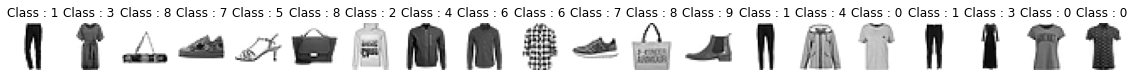

In [14]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
    plt.subplot(1, 20, idx + 1)
    plt.axis('off')
    plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
    plt.title(f'Class : {y[idx]}')

In [15]:
X_test = test.values
X_test = X_test.reshape(-1, 28, 28, 1)

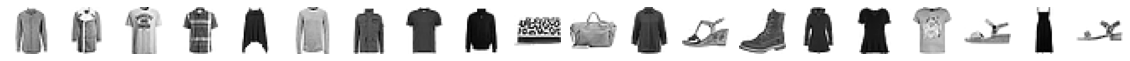

In [16]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
    plt.subplot(1, 20, idx + 1)
    plt.axis('off')
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

# 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [19]:
# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Baseline Model

## Simple DNN

In [20]:
BATCH_SIZE = 128
EPOCHS = 15

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# SGD
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.5034 - val_accuracy: 0.8228
Epoch 2/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4734 - accuracy: 0.8345 - val_loss: 0.4807 - val_accuracy: 0.8339
Epoch 3/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4540 - accuracy: 0.8395 - val_loss: 0.4436 - val_accuracy: 0.8474
Epoch 4/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4421 - accuracy: 0.8444 - val_loss: 0.4495 - val_accuracy: 0.8439
Epoch 5/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4359 - accuracy: 0.8475 - val_loss: 0.4388 - val_accuracy: 0.8476
Epoch 6/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4287 - accuracy: 0.8480 - val_loss: 0.4788 - val_accuracy: 0.8422
Epoch 7/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4244 - accuracy: 0.8522 - val_loss: 0.4507 - val_accuracy:

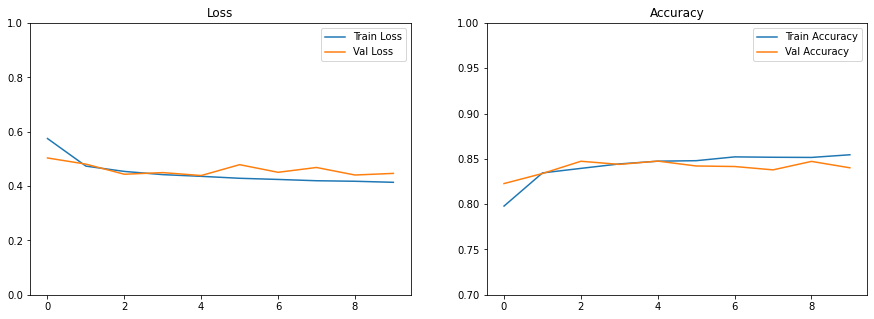

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

## Activation Function

In [27]:
# relu
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [30]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.6324 - accuracy: 0.7824 - val_loss: 0.4544 - val_accuracy: 0.8402
Epoch 2/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4360 - accuracy: 0.8446 - val_loss: 0.4021 - val_accuracy: 0.8567
Epoch 3/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3899 - accuracy: 0.8594 - val_loss: 0.3695 - val_accuracy: 0.8695
Epoch 4/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3609 - accuracy: 0.8706 - val_loss: 0.3732 - val_accuracy: 0.8641
Epoch 5/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3387 - accuracy: 0.8775 - val_loss: 0.3413 - val_accuracy: 0.8761
Epoch 6/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3225 - accuracy: 0.8829 - val_loss: 0.3395 - val_accuracy: 0.8764
Epoch 7/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8865 - val_loss: 0.3225 - val_accuracy:

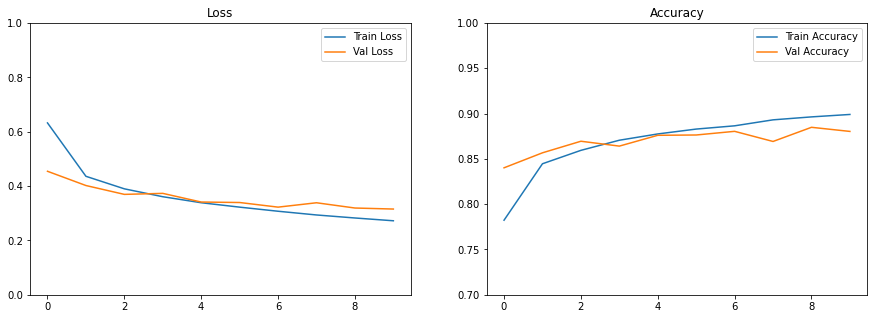

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* Activation Function을 추가한 후에는 하기 전보다 Loss가 많이 감소하고 Accuracy가 오르는 성능 향상을 보임.

## Weight Initialization

In [32]:
# He 초깃값
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [34]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [35]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.6016 - accuracy: 0.7918 - val_loss: 0.4554 - val_accuracy: 0.8390
Epoch 2/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.4266 - accuracy: 0.8468 - val_loss: 0.3948 - val_accuracy: 0.8585
Epoch 3/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3801 - accuracy: 0.8637 - val_loss: 0.3791 - val_accuracy: 0.8655
Epoch 4/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3505 - accuracy: 0.8724 - val_loss: 0.3903 - val_accuracy: 0.8565
Epoch 5/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.3286 - accuracy: 0.8809 - val_loss: 0.3394 - val_accuracy: 0.8755
Epoch 6/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8858 - val_loss: 0.3413 - val_accuracy: 0.8769
Epoch 7/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2972 - accuracy: 0.8911 - val_loss: 0.3377 - val_accuracy:

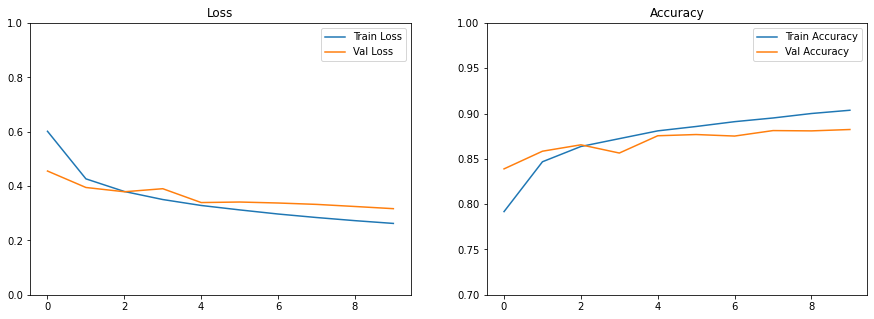

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* weight initialization을 한 후에는 하기 전보다 loss가 감소하고 accuracy가 올라 성능이 향상됨.

## Batch Normalization

In [37]:
# BatchNormalization()
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [38]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [39]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [40]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.5303 - accuracy: 0.8182 - val_loss: 0.3748 - val_accuracy: 0.8645
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8658 - val_loss: 0.3588 - val_accuracy: 0.8642
Epoch 3/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3322 - accuracy: 0.8797 - val_loss: 0.3256 - val_accuracy: 0.8790
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.2979 - accuracy: 0.8919 - val_loss: 0.3186 - val_accuracy: 0.8825
Epoch 5/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2751 - accuracy: 0.9004 - val_loss: 0.3169 - val_accuracy: 0.8851
Epoch 6/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2532 - accuracy: 0.9082 - val_loss: 0.3286 - val_accuracy: 0.8818
Epoch 7/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2324 - accuracy: 0.9146 - val_loss: 0.3339 - val_accuracy:

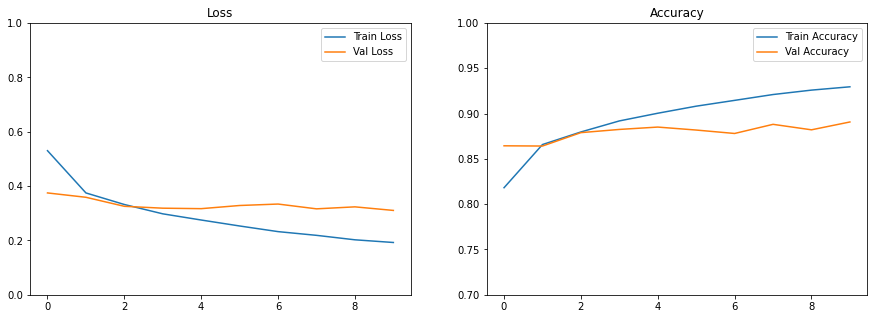

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* Batch normalization을 한 후에는 하기 전보다 loss가 감소하고 accuracy가 올라 성능이 향상됨.

## Optimization

In [42]:
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [43]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [44]:
# Adam
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [45]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8028 - val_loss: 0.3989 - val_accuracy: 0.8588
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4198 - accuracy: 0.8467 - val_loss: 0.3947 - val_accuracy: 0.8493
Epoch 3/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8607 - val_loss: 0.4181 - val_accuracy: 0.8473
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3481 - accuracy: 0.8715 - val_loss: 0.3518 - val_accuracy: 0.8702
Epoch 5/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3253 - accuracy: 0.8786 - val_loss: 0.3610 - val_accuracy: 0.8676
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3050 - accuracy: 0.8861 - val_loss: 0.3205 - val_accuracy: 0.8810
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.2879 - accuracy: 0.8928 - val_loss: 0.4503 - val_accuracy:

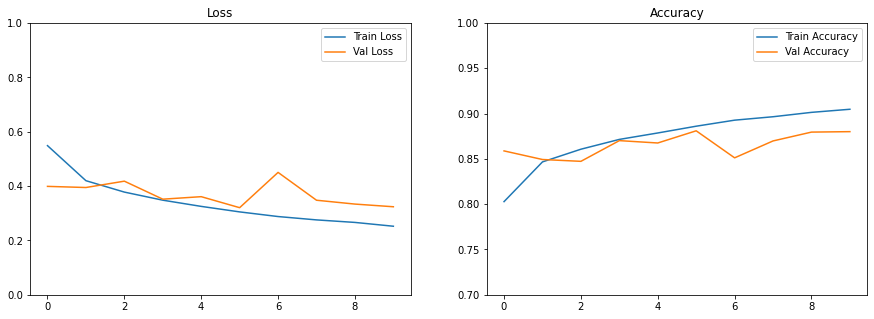

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* Adam optimization을 한 후에는 하기 전보다 성능이 향상되지는 않음.

## Dropout

In [47]:
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [48]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                      

In [49]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [50]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7892 - val_loss: 0.4028 - val_accuracy: 0.8520
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4678 - accuracy: 0.8305 - val_loss: 0.4005 - val_accuracy: 0.8482
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4302 - accuracy: 0.8449 - val_loss: 0.4269 - val_accuracy: 0.8475
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4050 - accuracy: 0.8530 - val_loss: 0.3914 - val_accuracy: 0.8630
Epoch 5/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.3828 - accuracy: 0.8601 - val_loss: 0.3480 - val_accuracy: 0.8639
Epoch 6/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.3667 - accuracy: 0.8683 - val_loss: 0.3224 - val_accuracy: 0.8789
Epoch 7/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.3503 - accuracy: 0.8713 - val_loss: 0.3232 - val_accuracy:

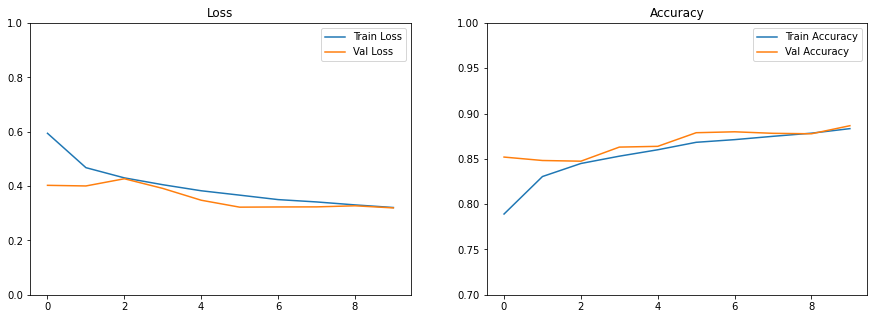

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* Dropout을 진행한 후에는 과적합을 방지해주고 성능이 향상됨을 알 수 있음.

## Regularization

In [52]:
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [53]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                      

In [54]:
# decay
optimizer = keras.optimizers.Adam(lr=0.01, decay=0.001)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [55]:
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.5684 - accuracy: 0.7967 - val_loss: 0.4176 - val_accuracy: 0.8443
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4161 - accuracy: 0.8493 - val_loss: 0.3539 - val_accuracy: 0.8670
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3697 - accuracy: 0.8664 - val_loss: 0.3247 - val_accuracy: 0.8791
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3338 - accuracy: 0.8762 - val_loss: 0.3015 - val_accuracy: 0.8876
Epoch 5/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8844 - val_loss: 0.2962 - val_accuracy: 0.8893
Epoch 6/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.2952 - accuracy: 0.8899 - val_loss: 0.2877 - val_accuracy: 0.8929
Epoch 7/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.2823 - accuracy: 0.8951 - val_loss: 0.2843 - val_accuracy:

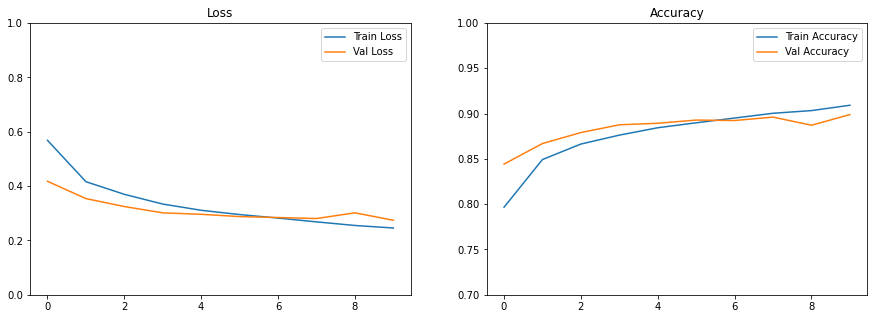

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

* Regularization을 한 후에는 loss가 줄어들고 accuracy가 늘어 성능이 향상됨을 알 수 있었음.

## 제출

In [57]:
BATCH_SIZE = 128
EPOCHS = 100

In [58]:
initializer = keras.initializers.HeUniform(seed=21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

In [59]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                      

In [60]:
optimizer = keras.optimizers.Adam(lr=0.01, decay=0.001)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [61]:
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/100
372/372 [==============================] - 3s 6ms/step - loss: 0.5267 - accuracy: 0.8096 - val_loss: 0.4530 - val_accuracy: 0.8393
Epoch 2/100
372/372 [==============================] - 2s 6ms/step - loss: 0.3996 - accuracy: 0.8535 - val_loss: 0.3773 - val_accuracy: 0.8568
Epoch 3/100
372/372 [==============================] - 2s 6ms/step - loss: 0.3524 - accuracy: 0.8713 - val_loss: 0.3741 - val_accuracy: 0.8608
Epoch 4/100
372/372 [==============================] - 2s 5ms/step - loss: 0.3277 - accuracy: 0.8780 - val_loss: 0.4035 - val_accuracy: 0.8450
Epoch 5/100
372/372 [==============================] - 2s 5ms/step - loss: 0.2990 - accuracy: 0.8889 - val_loss: 0.3256 - val_accuracy: 0.8750
Epoch 6/100
372/372 [==============================] - 2s 5ms/step - loss: 0.2795 - accuracy: 0.8953 - val_loss: 0.3294 - val_accuracy: 0.8763
Epoch 7/100
372/372 [==============================] - 2s 6ms/step - loss: 0.2624 - accuracy: 0.9015 - val_loss: 0.3206 - val_accuracy: 0.8813

Epoch 58/100
372/372 [==============================] - 3s 8ms/step - loss: 0.0446 - accuracy: 0.9834 - val_loss: 0.4710 - val_accuracy: 0.9035
Epoch 59/100
372/372 [==============================] - 3s 8ms/step - loss: 0.0434 - accuracy: 0.9836 - val_loss: 0.4689 - val_accuracy: 0.9042
Epoch 60/100
372/372 [==============================] - 3s 8ms/step - loss: 0.0417 - accuracy: 0.9853 - val_loss: 0.4853 - val_accuracy: 0.9020
Epoch 61/100
372/372 [==============================] - 3s 9ms/step - loss: 0.0406 - accuracy: 0.9849 - val_loss: 0.4815 - val_accuracy: 0.9049
Epoch 62/100
372/372 [==============================] - 3s 9ms/step - loss: 0.0392 - accuracy: 0.9854 - val_loss: 0.4745 - val_accuracy: 0.9058
Epoch 63/100
372/372 [==============================] - 4s 10ms/step - loss: 0.0405 - accuracy: 0.9850 - val_loss: 0.4726 - val_accuracy: 0.9050
Epoch 64/100
372/372 [==============================] - 5s 14ms/step - loss: 0.0396 - accuracy: 0.9852 - val_loss: 0.4887 - val_accurac

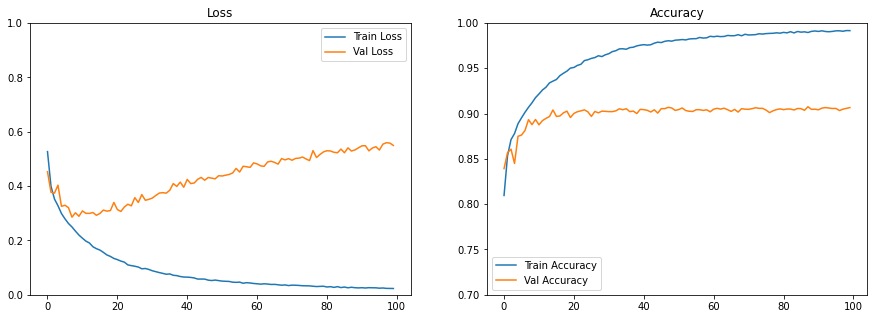

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()

In [64]:
pred_label = np.argmax(model.predict(X_test), axis=1)
submission['label'] = pred_label
submission.to_csv(data_dir + 'BaseLine_Model.csv', index=False)
submission.head()

,id,label
0,0,6
1,1,4
2,2,0
3,3,6
4,4,6


# Assignment


In [66]:
#pip install tensorflow_datasets

     ---------------------------------------- 4.2/4.2 MB 20.5 MB/s eta 0:00:00
     ---------------------------------------- 48.8/48.8 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 86.9/86.9 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 212.3/212.3 KB 12.6 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=4f6b80c5e44552c16ee19044e34ae0960ae58613f4a385b129e62f48a93ab804
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


In [67]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils import np_utils

In [68]:
X_train_after = X_train.astype('float32')
X_test1_after = X_val.astype('float32')
X_test2_after = X_test.astype('float32')

In [69]:
batch_size = 64

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
datagen = ImageDataGenerator(rotation_range=0,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)

In [73]:
train_dataset = datagen.flow(X_train_after, y_train, batch_size=batch_size)
test1_dataset = tf.data.Dataset.from_tensor_slices((X_test1_after, y_val))
test1_dataset = test1_dataset.batch(batch_size)

## 라이브러리 임포트

In [74]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [75]:
model = Sequential([
    Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(512, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dropout(0.6),
    
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
    
])

In [76]:
from keras import optimizers

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [84]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_sparse_categorical_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

In [85]:
from keras.callbacks import EarlyStopping

In [86]:
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',
                             patience=10,)

In [87]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 28, 28, 64)       

In [88]:
result = model.fit(train_dataset, epochs=100, callbacks=[cp_callback, earlystopping], validation_data=(test1_dataset))

Epoch 1/100
744/744 [==============================] - ETA: 0s - loss: 0.8745 - sparse_categorical_accuracy: 0.6749
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.80613, saving model to /content\checkpoint_entire_best.h5
744/744 [==============================] - 478s 642ms/step - loss: 0.8745 - sparse_categorical_accuracy: 0.6749 - val_loss: 0.5293 - val_sparse_categorical_accuracy: 0.8061
Epoch 2/100
744/744 [==============================] - ETA: 0s - loss: 0.5008 - sparse_categorical_accuracy: 0.8249
Epoch 2: val_sparse_categorical_accuracy improved from 0.80613 to 0.87748, saving model to /content\checkpoint_entire_best.h5
744/744 [==============================] - 522s 702ms/step - loss: 0.5008 - sparse_categorical_accuracy: 0.8249 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8775
Epoch 3/100
744/744 [==============================] - ETA: 0s - loss: 0.4131 - sparse_categorical_accuracy: 0.8575
Epoch 3: val_sparse_categorical_accuracy did not improve 

744/744 [==============================] - ETA: 0s - loss: 0.1839 - sparse_categorical_accuracy: 0.9378
Epoch 22: val_sparse_categorical_accuracy did not improve from 0.93303
744/744 [==============================] - 567s 762ms/step - loss: 0.1839 - sparse_categorical_accuracy: 0.9378 - val_loss: 0.2046 - val_sparse_categorical_accuracy: 0.9254
Epoch 23/100
744/744 [==============================] - ETA: 0s - loss: 0.1799 - sparse_categorical_accuracy: 0.9384
Epoch 23: val_sparse_categorical_accuracy improved from 0.93303 to 0.93437, saving model to /content\checkpoint_entire_best.h5
744/744 [==============================] - 534s 718ms/step - loss: 0.1799 - sparse_categorical_accuracy: 0.9384 - val_loss: 0.1826 - val_sparse_categorical_accuracy: 0.9344
Epoch 24/100
744/744 [==============================] - ETA: 0s - loss: 0.1728 - sparse_categorical_accuracy: 0.9411
Epoch 24: val_sparse_categorical_accuracy did not improve from 0.93437
744/744 [==============================] - 514s

In [89]:
model = keras.models.load_model('/content/checkpoint_entire_best.h5')

In [90]:
pred_label = np.argmax(model.predict(X_test), axis=1)
submission['label'] = pred_label
submission.to_csv(data_dir + 'final.csv', index=False)
submission.head()

,id,label
0,0,6
1,1,6
2,2,0
3,3,6
4,4,6


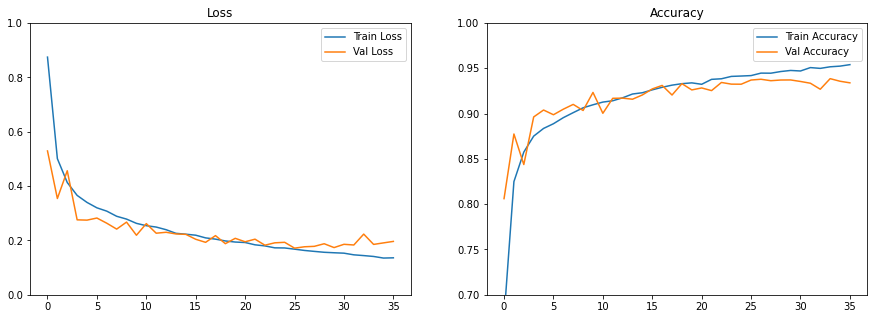

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(result.epoch, result.history['loss'], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['sparse_categorical_accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('Accuracy')

plt.show()